<a href="https://www.kaggle.com/code/nishathmhd/pneumonia-detection-using-tensorflow-keras?scriptVersionId=164312843" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Import Required Libraries

In [2]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
import os

import warnings
warnings.filterwarnings('ignore')

## Preprocess Data

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/train"
test_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/test"
validation_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/val"

batch_size = 32
image_height = 224
image_width = 224

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary')

val_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


## Build Model Architecture

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def build_model():
   model = Sequential()
   model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(image_height, image_width, 3)))
   model.add(MaxPooling2D((2, 2)))
   model.add(Flatten())
   model.add(Dense(units=128, activation="relu"))
   model.add(Dense(units=1, activation="sigmoid"))
   return model

In [5]:
# Compile & Train Model

model = build_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
163/163 [==============================] - 184s 1s/step - loss: 1.2731 - accuracy: 0.8576 - val_loss: 1.1200 - val_accuracy: 0.6250
Epoch 2/10
163/163 [==============================] - 143s 877ms/step - loss: 0.2095 - accuracy: 0.9191 - val_loss: 0.8049 - val_accuracy: 0.6250
Epoch 3/10
163/163 [==============================] - 143s 874ms/step - loss: 0.1987 - accuracy: 0.9231 - val_loss: 1.3479 - val_accuracy: 0.6250
Epoch 4/10
163/163 [==============================] - 144s 879ms/step - loss: 0.2114 - accuracy: 0.9155 - val_loss: 1.1865 - val_accuracy: 0.6250
Epoch 5/10
163/163 [==============================] - 141s 864ms/step - loss: 0.2137 - accuracy: 0.9153 - val_loss: 0.8803 - val_accuracy: 0.6875
Epoch 6/10
163/163 [==============================] - 143s 873ms/step - loss: 0.1848 - accuracy: 0.9306 - val_loss: 0.9155 - val_accuracy: 0.6875
Epoch 7/10
163/163 [==============================] - 141s 861ms/step - loss: 0.1890 - accuracy: 0.9270 - val_loss: 1.2956 - va

## Evaluate Model Performance

In [6]:
score = model.evaluate(test_generator)
print('Test Loss: ', score[0])
print('Test Accuracy: ', score[1])

163/163 [==============================] - 54s 332ms/step - loss: 0.1078 - accuracy: 0.9617
Test Loss:  0.10784637182950974
Test Accuracy:  0.9616564512252808


## Visualization

In [7]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Predict probabilities for test data
y_pred_prob = model.predict(test_generator).ravel()

# Predicted labels based on threshold
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# True labels
y_true = test_generator.classes

163/163 [==============================] - 53s 323ms/step


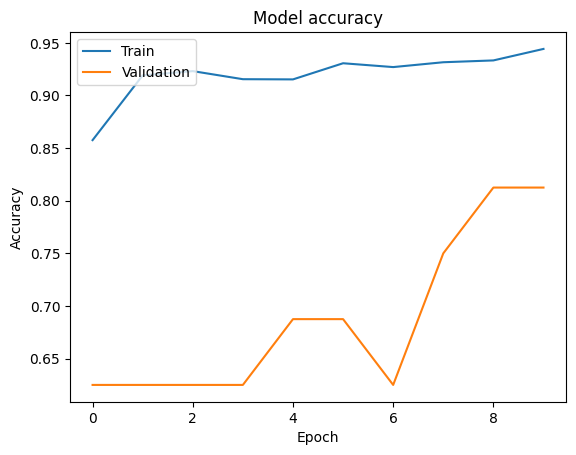

In [9]:
# Plot training & validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

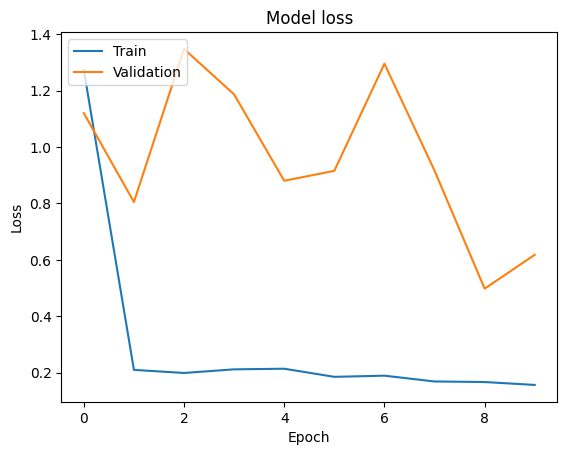

In [10]:
# Plot training & validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

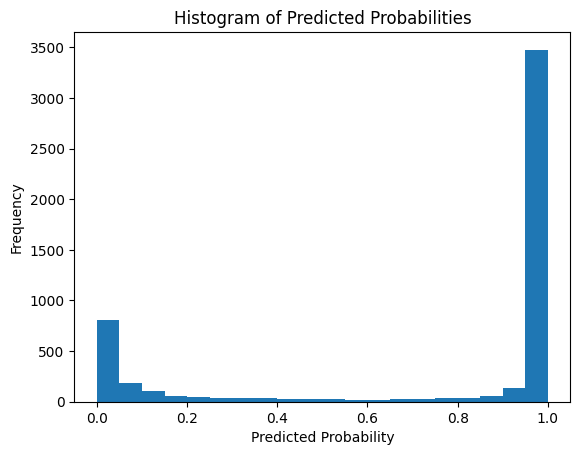

In [11]:
# Histograms/Bar Charts

plt.hist(y_pred_prob, bins=20)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

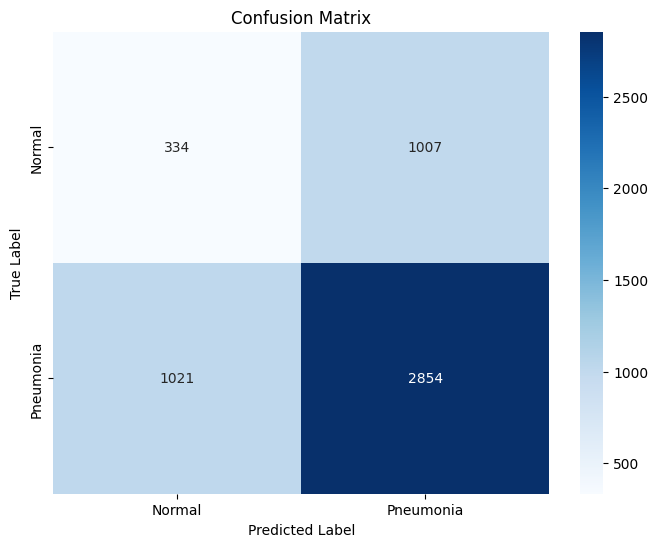

In [12]:
# Confusion Matrix

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

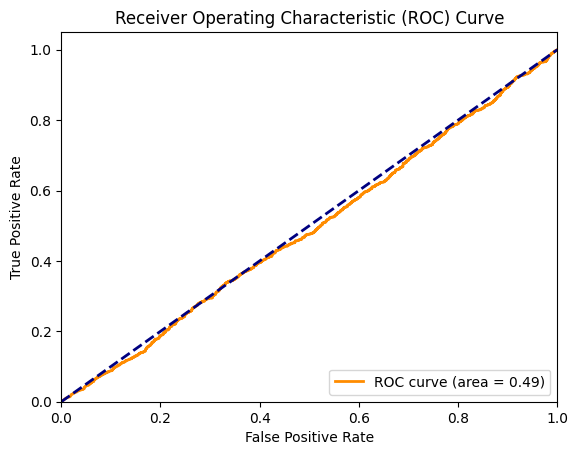

In [13]:
# ROC Curve

fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

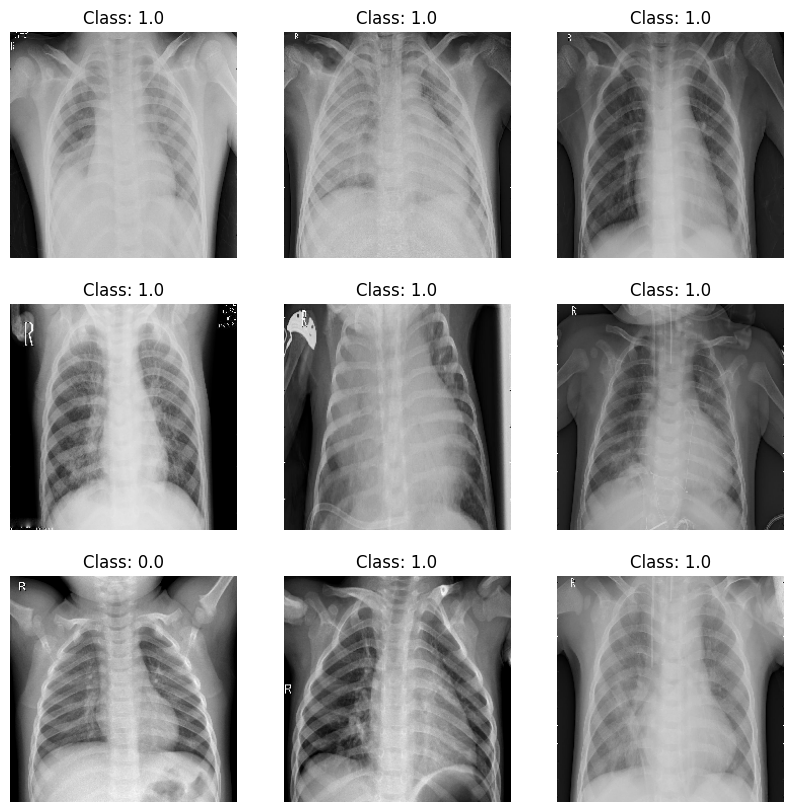

In [14]:
# Get a batch of images from the test generator
sample_images, sample_labels = test_generator.next()

# Plot the images
plt.figure(figsize=(10, 10))
for i in range(9):  
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.title('Class: {}'.format(sample_labels[i]))
    plt.axis('off')
plt.show()

## The End